In [143]:
import warnings
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [144]:
data = pd.read_csv('googleplaystore.csv')

In [145]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [146]:
df = data[['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type']]

In [147]:
df.head()

,App,Rating,Reviews,Size,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free
1,Coloring book moana,3.9,967,14M,"500,000+",Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free


In [148]:
df.isnull().sum()

App            0
Rating      1474
Reviews        0
Size           0
Installs       0
Type           1
dtype: int64

In [149]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [150]:
df.head()

,App,Rating,Reviews,Size,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free
1,Coloring book moana,3.9,967,14M,"500,000+",Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free


In [151]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x) * 1000000
        return x
    elif 'k' in size:
        x = size[:-1]
        x = float(x) * 1000
        return x
    else:
        return None

In [152]:
df['Size'] = df['Size'].apply(lambda x: change_size(x))

In [153]:
df.isnull().sum()

App            0
Rating         0
Reviews        0
Size        1696
Installs       0
Type           1
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       10841 non-null  object 
 1   Rating    10841 non-null  float64
 2   Reviews   10841 non-null  int64  
 3   Size      9145 non-null   float64
 4   Installs  10841 non-null  object 
 5   Type      10840 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 508.3+ KB


In [155]:
df['Size'] = df['Size'].fillna(df['Size'].median())

In [156]:
df['Reviews'] = df['Reviews'].astype('int32')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       10841 non-null  object 
 1   Rating    10841 non-null  float64
 2   Reviews   10841 non-null  int32  
 3   Size      10841 non-null  float64
 4   Installs  10841 non-null  object 
 5   Type      10840 non-null  object 
dtypes: float64(2), int32(1), object(3)
memory usage: 465.9+ KB


In [158]:
df.head()

,App,Rating,Reviews,Size,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,"10,000+",Free
1,Coloring book moana,3.9,967,14000000.0,"500,000+",Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,"5,000,000+",Free
3,Sketch - Draw & Paint,4.5,215644,25000000.0,"50,000,000+",Free
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,"100,000+",Free


In [159]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [160]:
df['Price'] = data[['Price']]

In [161]:
df.head()

,App,Rating,Reviews,Size,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,"10,000+",Free,0
1,Coloring book moana,3.9,967,14000000.0,"500,000+",Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,"5,000,000+",Free,0
3,Sketch - Draw & Paint,4.5,215644,25000000.0,"50,000,000+",Free,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,"100,000+",Free,0


In [162]:
df.isnull().sum()

App         0
Rating      0
Reviews     0
Size        0
Installs    0
Type        1
Price       0
dtype: int64

In [163]:
df['Type'] = df['Type'].fillna('Free')

In [164]:
df.isnull().sum()

App         0
Rating      0
Reviews     0
Size        0
Installs    0
Type        0
Price       0
dtype: int64

In [165]:
df['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [166]:
df['Type'] = df['Type'].apply(lambda x: x.replace('0','Free'))

In [167]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [168]:
def change_install(install):
    return install.split('+')[0].replace(',','')

In [169]:
df['Installs'] = df['Installs'].apply(lambda x: change_install(x))

In [170]:
df.head(10)

,App,Rating,Reviews,Size,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,10000,Free,0
1,Coloring book moana,3.9,967,14000000.0,500000,Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,5000000,Free,0
3,Sketch - Draw & Paint,4.5,215644,25000000.0,50000000,Free,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,100000,Free,0
5,Paper flowers instructions,4.4,167,5600000.0,50000,Free,0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,19000000.0,50000,Free,0
7,Infinite Painter,4.1,36815,29000000.0,1000000,Free,0
8,Garden Coloring Book,4.4,13791,33000000.0,1000000,Free,0
9,Kids Paint Free - Drawing Fun,4.7,121,3100000.0,10000,Free,0


In [171]:
le = LabelEncoder()

In [172]:
df['Type'] = le.fit_transform(df['Type'])

In [173]:
df.head(10)

,App,Rating,Reviews,Size,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,10000,0,0
1,Coloring book moana,3.9,967,14000000.0,500000,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,5000000,0,0
3,Sketch - Draw & Paint,4.5,215644,25000000.0,50000000,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,100000,0,0
5,Paper flowers instructions,4.4,167,5600000.0,50000,0,0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,19000000.0,50000,0,0
7,Infinite Painter,4.1,36815,29000000.0,1000000,0,0
8,Garden Coloring Book,4.4,13791,33000000.0,1000000,0,0
9,Kids Paint Free - Drawing Fun,4.7,121,3100000.0,10000,0,0


In [175]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('Free','0'))

In [176]:
df['Installs'] = df['Installs'].astype(float)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       10841 non-null  object 
 1   Rating    10841 non-null  float64
 2   Reviews   10841 non-null  int32  
 3   Size      10841 non-null  float64
 4   Installs  10841 non-null  float64
 5   Type      10841 non-null  int32  
 6   Price     10841 non-null  object 
dtypes: float64(3), int32(2), object(2)
memory usage: 508.3+ KB


In [178]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [182]:
df['Genre'] = data['Genres']

In [183]:
df_stat = df[['Rating','Reviews','Size','Installs','Type']]

In [185]:
df_info = df[['App', 'Genre', 'Price']]

In [186]:
df_stat

,Rating,Reviews,Size,Installs,Type
0,4.1,159,19000000.0,10000.0,0
1,3.9,967,14000000.0,500000.0,0
2,4.7,87510,8700000.0,5000000.0,0
3,4.5,215644,25000000.0,50000000.0,0
4,4.3,967,2800000.0,100000.0,0
...,...,...,...,...,...
10836,4.5,38,53000000.0,5000.0,0
10837,5.0,4,3600000.0,100.0,0
10838,4.3,3,9500000.0,1000.0,0
10839,4.5,114,13000000.0,1000.0,0


In [187]:
k_range = range(1,15)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df_stat.iloc[:,0:].values)
    sse.append(km.inertia_)

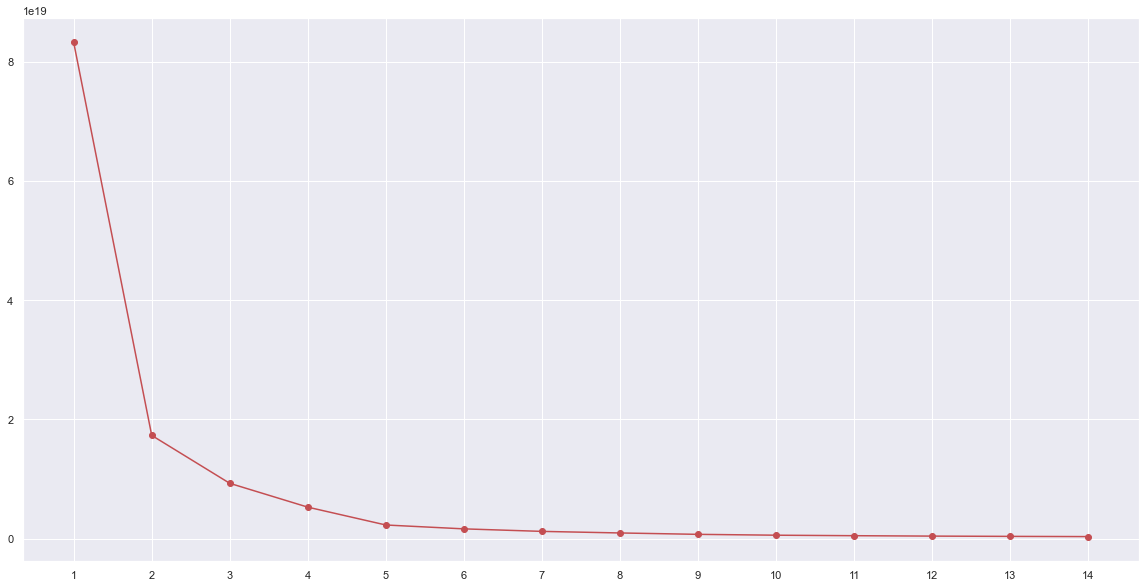

In [188]:
sb.set(rc={'figure.figsize': (20,10)})
plt.plot(k_range, sse, color='r', marker='o')
plt.xticks(k_range)
plt.show()

In [189]:
km = KMeans(n_clusters=3)
cluster = km.fit_predict(df_stat.iloc[:,0:].values)

In [190]:
df_stat['cluster'] = cluster

In [191]:
df_stat

,Rating,Reviews,Size,Installs,Type,cluster
0,4.1,159,19000000.0,10000.0,0,0
1,3.9,967,14000000.0,500000.0,0,0
2,4.7,87510,8700000.0,5000000.0,0,0
3,4.5,215644,25000000.0,50000000.0,0,0
4,4.3,967,2800000.0,100000.0,0,0
...,...,...,...,...,...,...
10836,4.5,38,53000000.0,5000.0,0,0
10837,5.0,4,3600000.0,100.0,0,0
10838,4.3,3,9500000.0,1000.0,0,0
10839,4.5,114,13000000.0,1000.0,0,0


In [205]:
df_stat0 = df_stat[df_stat['cluster'] == 0]
df_stat1 = df_stat[df_stat['cluster'] == 1]
df_stat2 = df_stat[df_stat['cluster'] == 2]

In [206]:
km.cluster_centers_

array([[4.20661003e+00, 2.67312783e+05, 2.01383309e+07, 6.87456199e+06,
        7.46895715e-02],
       [4.25862069e+00, 2.13361817e+07, 1.95172414e+07, 1.00000000e+09,
        1.38777878e-17],
       [4.35000000e+00, 9.95738378e+06, 2.75416667e+07, 5.00000000e+08,
        0.00000000e+00]])

In [207]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    10841 non-null  float64
 1   Reviews   10841 non-null  int32  
 2   Size      10841 non-null  float64
 3   Installs  10841 non-null  float64
 4   Type      10841 non-null  int32  
 5   cluster   10841 non-null  int32  
dtypes: float64(3), int32(3)
memory usage: 381.3 KB


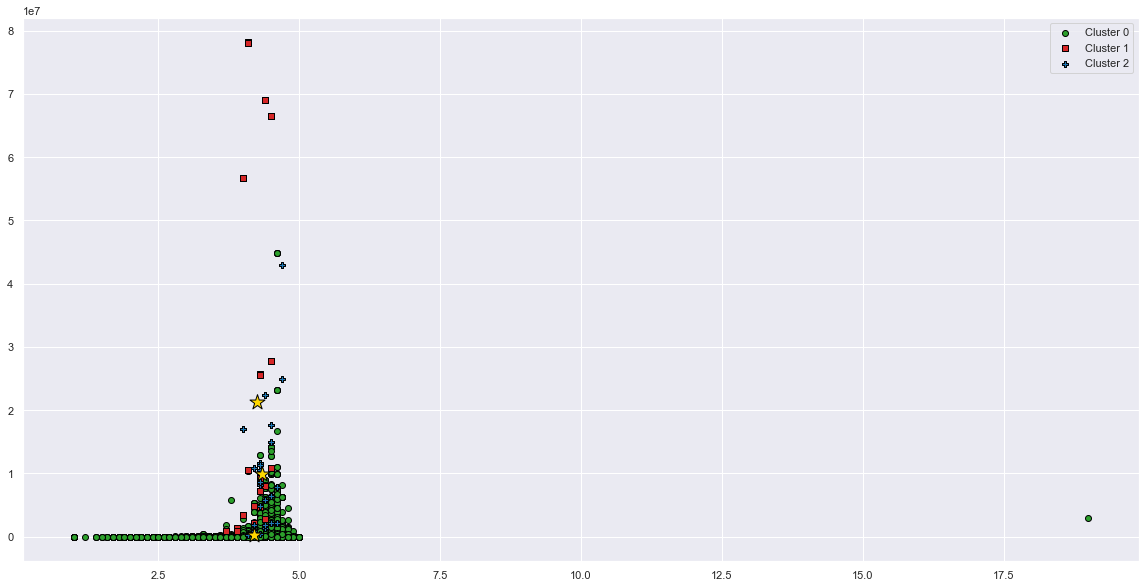

In [220]:
plt.scatter(
    df_stat0['Rating'], df_stat0['Reviews'],
    color='tab:green', edgecolors='black', 
    marker='o', label='Cluster 0'
)

plt.scatter(
    df_stat1['Rating'], df_stat1['Reviews'],
    color='tab:red', edgecolors='black', 
    marker='s', label='Cluster 1'
)

plt.scatter(
    df_stat2['Rating'], df_stat2['Reviews'],
    color='tab:blue', edgecolors='black', 
    marker='P', label='Cluster 2'
)

plt.scatter(
    km.cluster_centers_[:,0], km.cluster_centers_[:,1],
    color='gold', edgecolors='black', marker='*', s=250
)

plt.legend()
plt.show()

In [221]:
df_stat

,Rating,Reviews,Size,Installs,Type,cluster
0,4.1,159,19000000.0,10000.0,0,0
1,3.9,967,14000000.0,500000.0,0,0
2,4.7,87510,8700000.0,5000000.0,0,0
3,4.5,215644,25000000.0,50000000.0,0,0
4,4.3,967,2800000.0,100000.0,0,0
...,...,...,...,...,...,...
10836,4.5,38,53000000.0,5000.0,0,0
10837,5.0,4,3600000.0,100.0,0,0
10838,4.3,3,9500000.0,1000.0,0,0
10839,4.5,114,13000000.0,1000.0,0,0


In [224]:
df_info['Rating'] = df['Rating']

In [225]:
df_info

,App,Genre,Price,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,0,4.1
1,Coloring book moana,Art & Design;Pretend Play,0,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,0,4.7
3,Sketch - Draw & Paint,Art & Design,0,4.5
4,Pixel Draw - Number Art Coloring Book,Art & Design;Creativity,0,4.3
...,...,...,...,...
10836,Sya9a Maroc - FR,Education,0,4.5
10837,Fr. Mike Schmitz Audio Teachings,Education,0,5.0
10838,Parkinson Exercices FR,Medical,0,4.3
10839,The SCP Foundation DB fr nn5n,Books & Reference,0,4.5


In [227]:
lookup = df_info.merge(df_stat, how='right', on='Rating')
lookup

,App,Genre,Price,Rating,Reviews,Size,Installs,Type,cluster
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,0,4.1,159,19000000.0,10000.0,0,0
1,Infinite Painter,Art & Design,0,4.1,159,19000000.0,10000.0,0,0
2,Boys Photo Editor - Six Pack & Men's Suit,Art & Design,0,4.1,159,19000000.0,10000.0,0,0
3,Animated Photo Editor,Art & Design,0,4.1,159,19000000.0,10000.0,0,0
4,Easy Realistic Drawing Tutorial,Art & Design,0,4.1,159,19000000.0,10000.0,0,0
...,...,...,...,...,...,...,...,...,...
12008282,Slickdeals: Coupons & Shopping,Shopping,0,4.5,398307,19000000.0,10000000.0,0,0
12008283,FP Разбитый дисплей,Entertainment,0,4.5,398307,19000000.0,10000000.0,0,0
12008284,Sya9a Maroc - FR,Education,0,4.5,398307,19000000.0,10000000.0,0,0
12008285,The SCP Foundation DB fr nn5n,Books & Reference,0,4.5,398307,19000000.0,10000000.0,0,0


In [228]:
def recommender(rating, reviews, size, installs, app_type):
    result = km.predict([[rating, reviews, size, installs, app_type]])
    return lookup[lookup['cluster'] == result[0]].sample(10)

In [231]:
rating = 4.2
reviews = 2000
size = 150000
installs = 20000
app_type = 0
recommender(rating, reviews, size, installs, app_type)

,App,Genre,Price,Rating,Reviews,Size,Installs,Type,cluster
4727536,Home Scouting® MLS Mobile,Lifestyle,0,4.3,0,3600000.0,1.0,1,0
5933268,Maps - Navigate & Explore,Travel & Local,0,4.3,0,10000000.0,100.0,0,0
1459392,MIUI Style GO Weather EX,Weather,0,4.2,13799,13000000.0,500000.0,0,0
4672722,Bible du Semeur-BDS (French),Books & Reference,0,4.5,5150801,13000000.0,100000000.0,0,0
1096736,Camera V7 24 Megapixel,Photography,0,4.0,48445,10000000.0,5000000.0,0,0
11129695,Pistachio Launcher for Android P 9.0,Personalization,$1.49,4.3,7443,33000000.0,100000.0,0,0
5041396,Basketball FRVR - Shoot the Hoop and Slam Dunk!,Sports;Action & Adventure,0,4.5,5180480,26000000.0,100000000.0,0,0
9630571,Disney Magic Kingdoms: Build Your Own Magical ...,Simulation;Action & Adventure,0,4.3,0,13000000.0,50000.0,0,0
7205134,Teeny Titans - Teen Titans Go!,Strategy;Action & Adventure,$3.99,4.6,19640,67000000.0,100000.0,0,0
8328727,Weill Cornell Medicine,Medical,0,4.3,0,54000000.0,100.0,0,0
